In [214]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

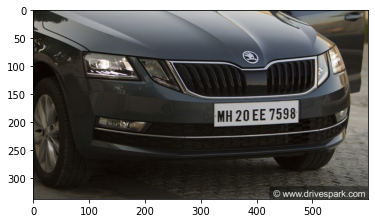

In [215]:
img=cv2.imread("img15.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

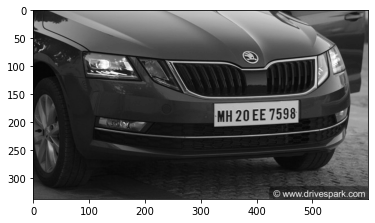

In [216]:
def plot_image(image,title=""):
    plt.figure(figsize=[10,10])
    plt.title(title)
    plt.imshow(image,cmap='gray')

gray_img=cv2.imread("img15.jpg")
gray_img=cv2.cvtColor(gray_img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap='gray')

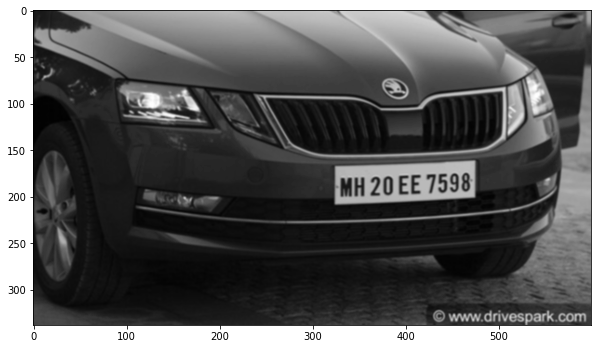

In [217]:
blur_image=cv2.GaussianBlur(gray_img,(3,3),0)
plot_image(blur_image)

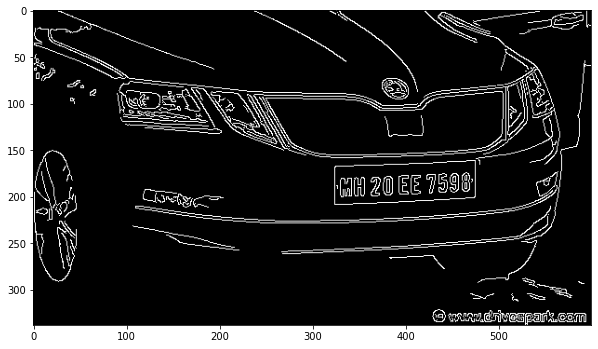

In [218]:
edged_image=cv2.Canny(blur_image,60,180)
plot_image(edged_image)

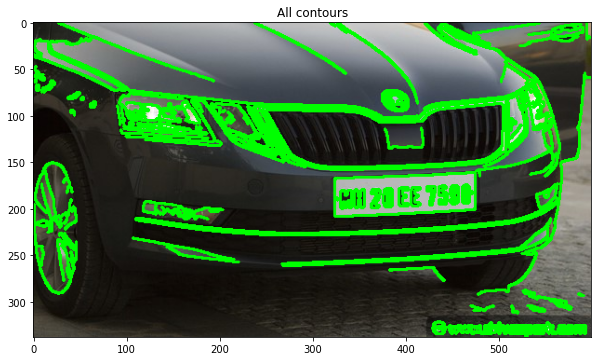

In [219]:
edged_copy=edged_image.copy()
contours,hierarchy=cv2.findContours(edged_copy,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
img_copy=img.copy()
cv2.drawContours(img_copy,contours,-1,(0,255,0),2)
plot_image(img_copy,"All contours")

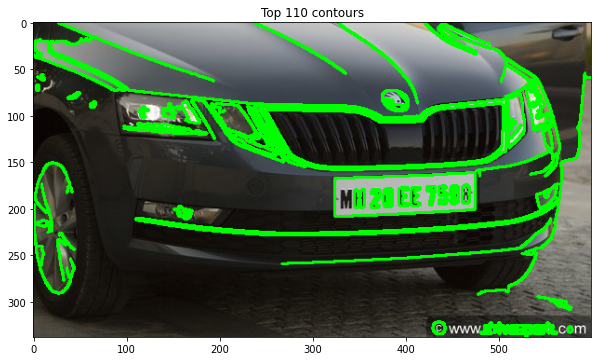

In [220]:
cnts=sorted(contours,key=cv2.contourArea,reverse=True)[:80]
NumberPlateCnt=None
img_copy2=img.copy()
cv2.drawContours(img_copy2,cnts,-1,(0,255,0),2)
plot_image(img_copy2,"Top 110 contours")

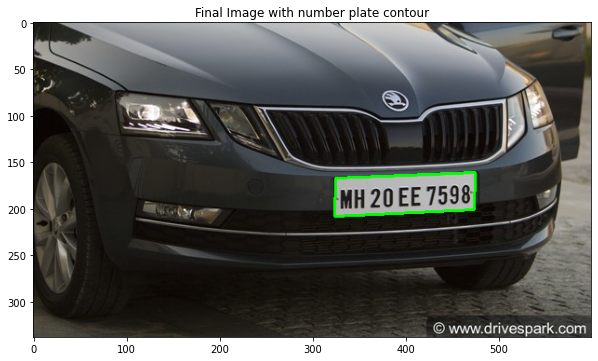

In [221]:
for c in cnts:
    perimeter=cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c,0.02*perimeter,True)
    if len(approx)==4:
        NumberPlateCnt=approx
        x,y,w,h=cv2.boundingRect(c)
        new_img=gray_img[y:y+h,x:x+w]
        cv2.imwrite("number plate image.jpg",new_img)
        break
img3=img.copy()
cv2.drawContours(img3,[NumberPlateCnt],-1,(0,255,0),2)
plot_image(img3,"Final Image with number plate contour")

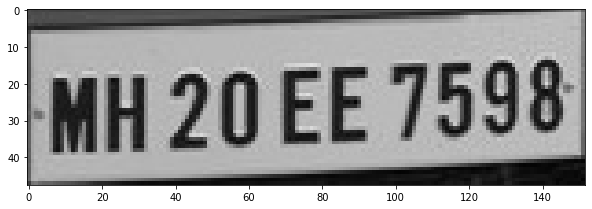

In [222]:
number_plate=cv2.imread('number plate image.jpg')
plot_image(number_plate)

In [223]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text=pytesseract.image_to_string('number plate image.jpg',lang='eng')
print("Number Plate is ",text)

Number Plate is  ‘MH 20 EE 7598



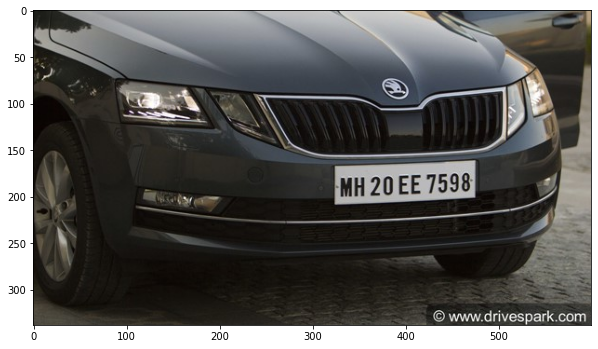

In [224]:
plot_image(img)

In [225]:
gray_copy=gray_img.copy()
image=cv2.imread('img15.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

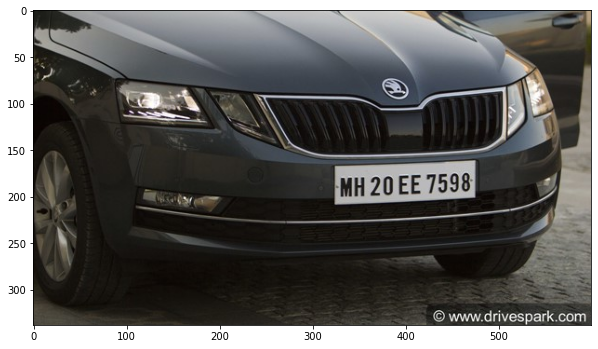

In [226]:
plot_image(image)

In [227]:
plate_cascade=cv2.CascadeClassifier('C:\\Users\\HP OMEN\\Desktop\\d_drive\\Self-Practise\\Python project tutorial\\haarcascade_russian_plate_number.xml')

In [228]:
def detect_number_plate(image):
    
    plate_image=image.copy()
    
    plate_rects=plate_cascade.detectMultiScale(plate_image,scaleFactor=1.3,minNeighbors=3)
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_image,(x,y),(x+w,y+h),(0,255,0),4)
        newu_img=gray_copy[y:y+h,x:x+w]
        cv2.imwrite("number plate image 3.jpg",newu_img)
        
    
    return plate_image
    

In [229]:
img=detect_number_plate(image)

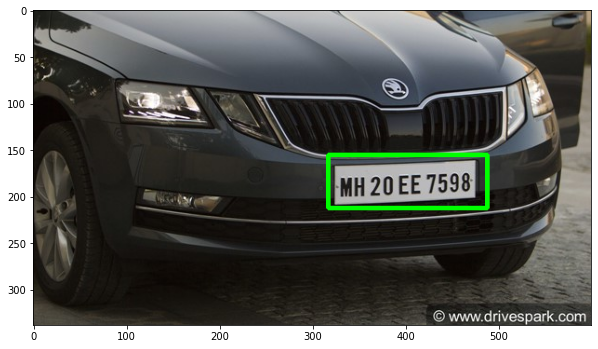

In [230]:
plot_image(img)

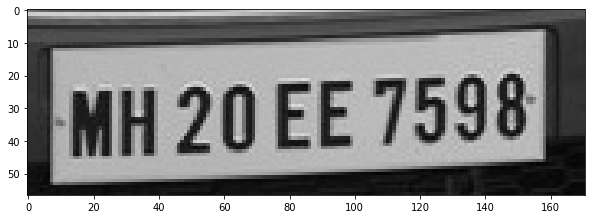

In [231]:
image3=cv2.imread('number plate image 3.jpg')
plot_image(image3)

In [232]:
text=pytesseract.image_to_string('number plate image 3.jpg',lang='eng')
print("Number Plate is ",text)

Number Plate is  H 20 EE 7598

